# Automatic Chemical Design Using a Data-Driven Continuous Representation of Molecules

paper: [link](https://pubs.acs.org/doi/full/10.1021/acscentsci.7b00572)

github: [link](https://github.com/aspuru-guzik-group/chemical_vae)



## Load libraries

In [168]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
import sys
#  add project directory
sys.path.append('./chemical_vae')

from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load a model

In [2]:
vae = VAEUtils(directory='chemical_vae/models/zinc_properties')

From /home/schreibf/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
/home/schreibf/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From /home/schreibf/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/schreibf/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1156

Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Using the VAE


In [15]:
nils_data_dir = '/home/schreibf/projects/data/nils_test'
nils_file = '/home/schreibf/projects/data/nils_test/EP-2501695-B1_sample.smi'
suppl = Chem.SmilesMolSupplier(nils_file,delimiter=' ',titleLine=False)
mols = [Chem.MolToSmiles(x) for x in suppl]


In [25]:
print(f"Trying to find analogs for {len(mols)} molecules.")

Trying to find analogs for 59 molecules.


### Example molecule

In [27]:
def encode_molecule(molecule):
    smiles_1 = mu.canon_smiles(molecule)
    X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
    z_1 = vae.encode(X_1)
    return z_1

In [35]:
def decode_molecule(molecule, dec_attempts=100, noise=100):
    return(vae.z_to_smiles( encode_molecule(molecule), decode_attempts=dec_attempts,noise_norm=noise))

In [162]:
def predict_mol(curr_mol):
    df = decode_molecule(curr_mol, dec_attempts=dec_attempts,noise=noise)
    #df['source_mol'] = curr_mol
    #df['source_mol_nr'] = curr_mol_count
    return(df)    

In [165]:
master_df = pd.DataFrame(columns =['source_mol_nr','source_mol','smiles','distance','count','frequency','mol']); master_df.head()
dec_attempts = 10
noise = 100
for curr_mol_count, curr_mol in enumerate(mols):
    predict_df = predict_mol(curr_mol)
    if(len(predict_df) > 0):
        predict_df['source_mol'] = curr_mol
        predict_df['source_mol_nr'] = curr_mol_count
        #print(f" source_mol_nr is {predict_df['source_mol_nr']} ")
        master_df = master_df.append(predict_df[['source_mol_nr','source_mol','smiles','distance','count','frequency', 'mol']])
    print(f"Molecule number {curr_mol_count} had {len(predict_df)} molecule(s) generated")
        

Molecule number 0 had 0 molecule(s) generated
Molecule number 1 had 2 molecule(s) generated
Molecule number 2 had 2 molecule(s) generated
Molecule number 3 had 0 molecule(s) generated
Molecule number 4 had 1 molecule(s) generated
Molecule number 5 had 1 molecule(s) generated
Molecule number 6 had 0 molecule(s) generated
Molecule number 7 had 0 molecule(s) generated
Molecule number 8 had 0 molecule(s) generated
Molecule number 9 had 0 molecule(s) generated
Molecule number 10 had 0 molecule(s) generated
Molecule number 11 had 2 molecule(s) generated
Molecule number 12 had 0 molecule(s) generated
Molecule number 13 had 0 molecule(s) generated
Molecule number 14 had 0 molecule(s) generated
Molecule number 15 had 0 molecule(s) generated
Molecule number 16 had 0 molecule(s) generated
Molecule number 17 had 0 molecule(s) generated
Molecule number 18 had 1 molecule(s) generated
Molecule number 19 had 0 molecule(s) generated
Molecule number 20 had 0 molecule(s) generated
Molecule number 21 had 

KeyError: '.'

 dataframe with all predictions has 3 entries for 2 / 59 molecules


,source_mol_nr,source_mol,smiles,distance,count,frequency,mol
0,2,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1,CC(C)(C)NCC(=O)c1cc(N)cc(O)c1,3.567879,1,1.000000,"<img src="""" alt=""Mol""/>"
0,4,CC(C)CC(N)C(O)CC(=O)O,CC(C)CC(N)C(O)CC(N)=O,2.983941,1,0.333333,"<img src="""" alt=""Mol""/>"
1,4,CC(C)CC(N)C(O)CC(=O)O,CC(C)CC(O)C(O)CC(N)=O,3.737236,2,0.666667,"<img src="""" alt=""Mol""/>"

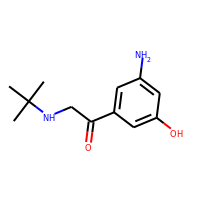
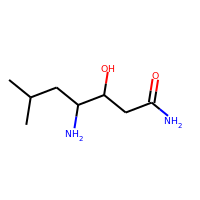
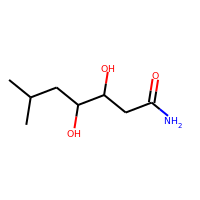

In [164]:
print(f" dataframe with all predictions has {len(master_df)} entries for {len(master_df['source_mol_nr'].unique())} / {len(mols)} molecules")
master_df

## Distance plot

/home/schreibf/anaconda3/envs/chemvae/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


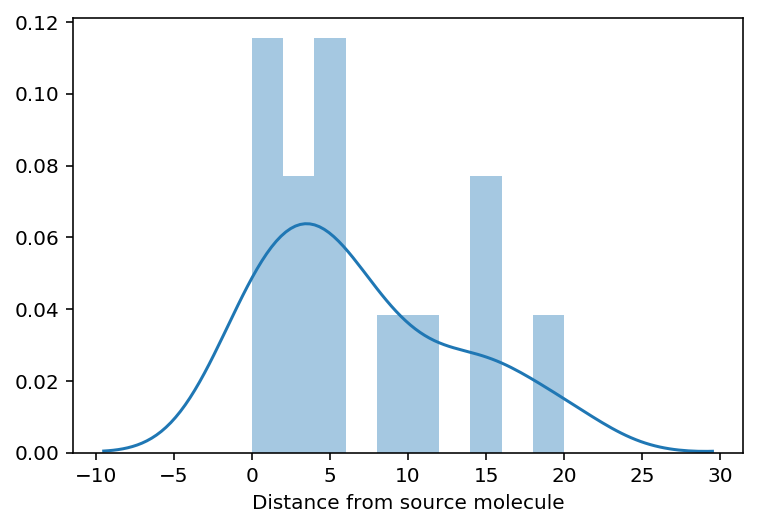

In [171]:
t = sns.distplot(master_df['distance'], bins=10, axlabel='Distance from source molecule', label='Overview of distances from source molecules')

## Plot results

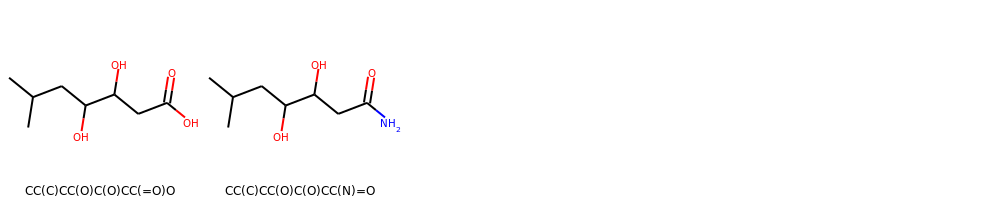

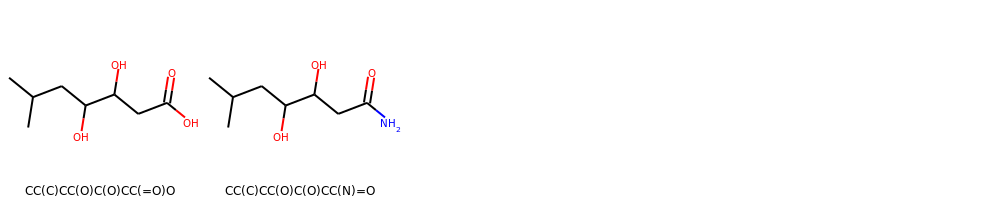

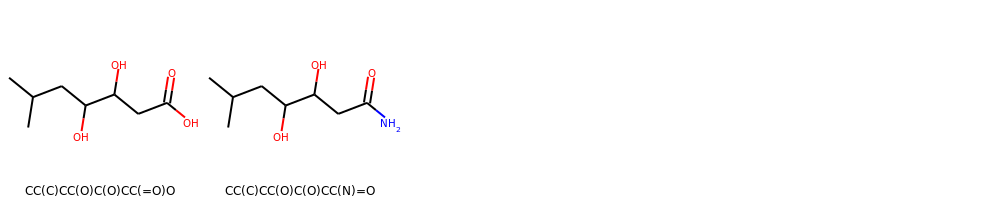

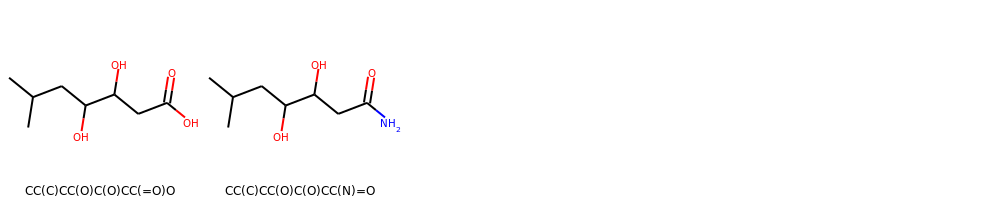

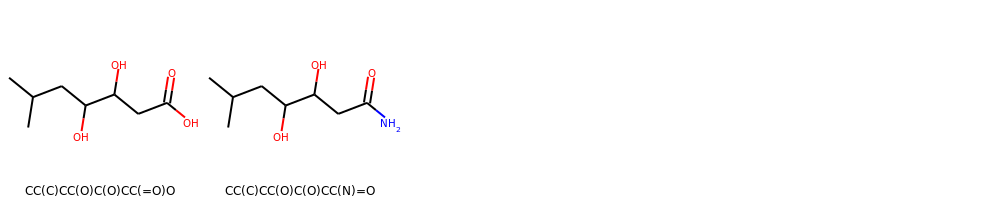

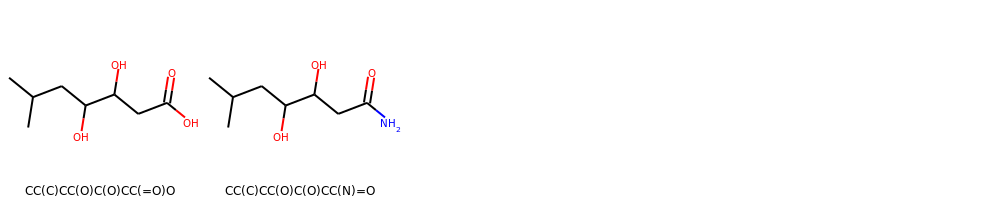

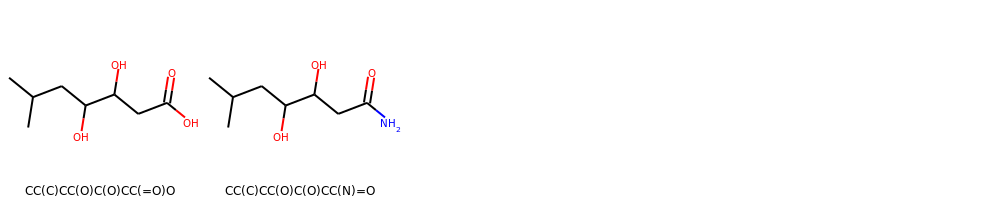

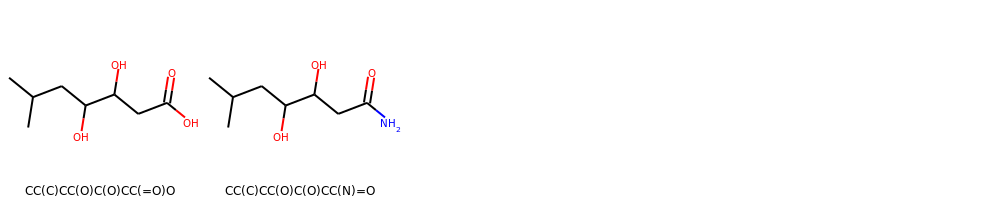

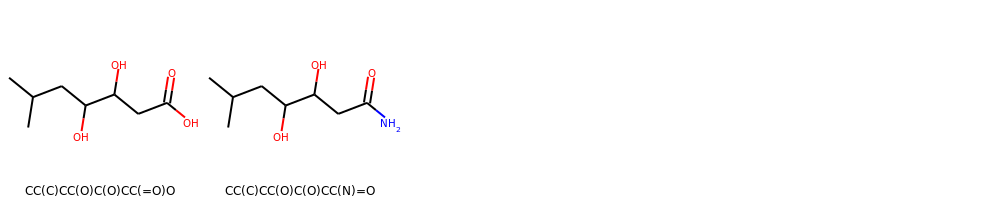

In [172]:
for i,item in enumerate(master_df['source_mol_nr'].unique()):
    display(PandasTools.FrameToGridImage(df[df['source_mol_nr'] == 1],column='mol', legendsCol='smiles',molsPerRow=5))

In [21]:
noise=100.0
print(f"Searching molecules randomly sampled from {noise} std (z-distance) from the point")
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print(vae.predict_prop_Z(z_1)[0])

Searching molecules randomly sampled from 100.0 std (z-distance) from the point
Found 0 unique mols, out of 0
[0.8744292 2.9458747 1.7259983]


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [5]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : ClCC(=O)N)C(=O)c1c(C)oc(C)c1C
Z representation     : (1, 196) with norm 10.690


## Try to reconstruct aspirin

In [15]:
aspirin = mu.canon_smiles('CC(=O)OC1=CC=CC=C1C(=O)O')
X_1 = vae.smiles_to_hot(aspirin, canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r = vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

print(f"Properties (qed,SAS,logP): {vae.predict_prop_Z(z_1)[0]}") 


Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : CC(=O)Oc1ccccc1C(N)=O
Z representation     : (1, 196) with norm 11.748
Properties (qed,SAS,logP): [0.72431093 2.2545812  0.52015066]


## property preditor

In [16]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):
[0.72431093 2.2545812  0.52015066]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 5.00 std (z-distance) from the point
Found 11 unique mols, out of 94
SMILES
 0     CC(=O)Oc1ccccc1C(=O)O
1     CC(=O)Oc1ccccc1C(N)=O
2     C(/CO)Oc1ccccc1C(N)=O
3     C(N=O)Oc1ccccc1C(N)=O
4     C(=O)O-c1ccccc1C(N)=O
5     C(C=O)Oc1ccccc1C(N)=O
6     C(=O)NOc1ccccc1C(N)=O
7     C(OCO)Oc1ccccc1C(N)=O
8     C(CO)NOc1ccccc1C(N)=O
9     Cl(=O)Oc1ccccc1C(N)=O
10    C(N=O)Oc1ccccc1C(=O)O
Name: smiles, dtype: object


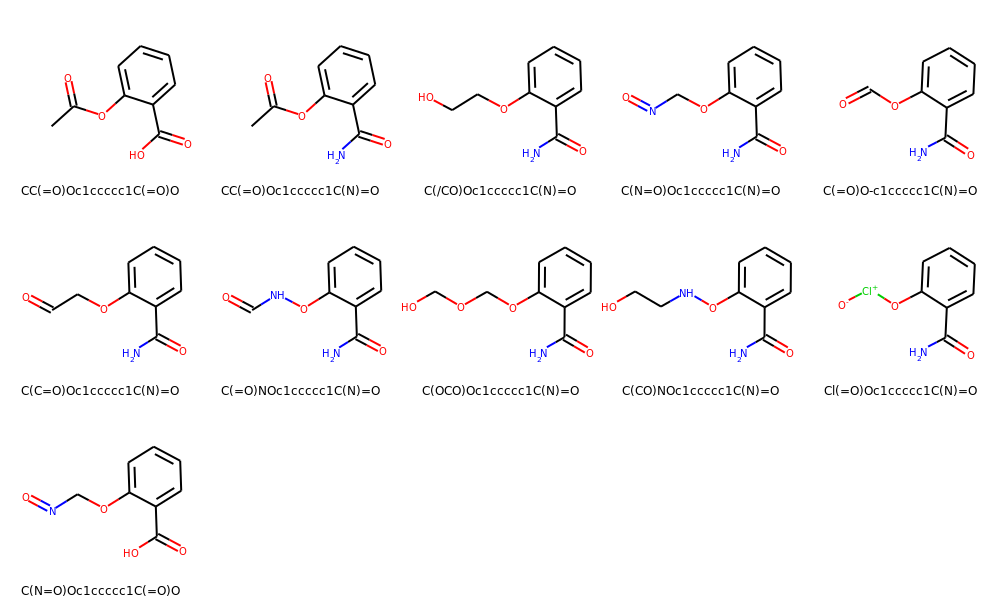

,smiles,distance,count,frequency,mol
0,CC(=O)Oc1ccccc1C(=O)O,0.000005,3,0.031915,"<img src="""" alt=""Mol""/>"
1,CC(=O)Oc1ccccc1C(N)=O,2.795310,76,0.808511,"<img src="""" alt=""Mol""/>"
2,C(/CO)Oc1ccccc1C(N)=O,8.111012,1,0.010638,"<img src="""" alt=""Mol""/>"
3,C(N=O)Oc1ccccc1C(N)=O,8.142980,1,0.010638,"<img src="""" alt=""Mol""/>"
4,C(=O)O-c1ccccc1C(N)=O,8.149736,1,0.010638,"<img src="""" alt=""Mol""/>"

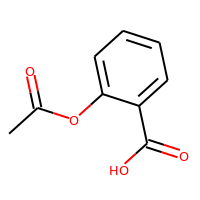
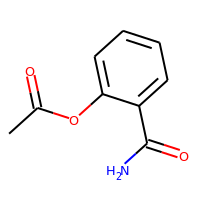
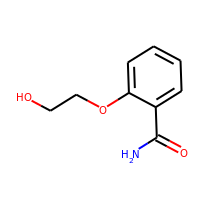
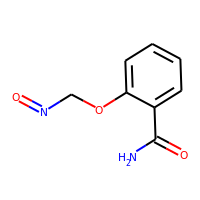
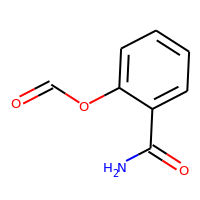

In [17]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

## PCA of latent space

Sample random points from the training set along with properties

In [18]:
Z, data, smiles = vae.ls_sampler_w_prop(size=50000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

,index,logP,qed,SAS,smiles
0,148368,1.77074,0.903106,4.102101,Cc1ccc([C@H](C)[NH2+]CC(C)(C)N2CCS(=O)CC2)c(C)c1
1,11366,4.40670,0.811630,3.121528,CC(C)[C@@H](NCc1nncn1C1CC1)c1c(Cl)cccc1Cl
2,69154,1.81690,0.757226,4.229582,CCn1cc(C[NH+]2CCC[C@H](Cc3nc4ccccc4[nH]3)C2)cn1
3,112512,4.95142,0.510459,3.319975,Cc1nnc(S[C@@H](C)C(=O)N2N=C(c3ccc(Cl)cc3)C[C@H]2c2ccco2)s1
4,249044,2.33190,0.792274,2.991435,COc1ccccc1NC(=O)CC[C@@H]1N=C(O)N(Cc2ccco2)C1=O


Perform a PCA projection and color the points based on a property

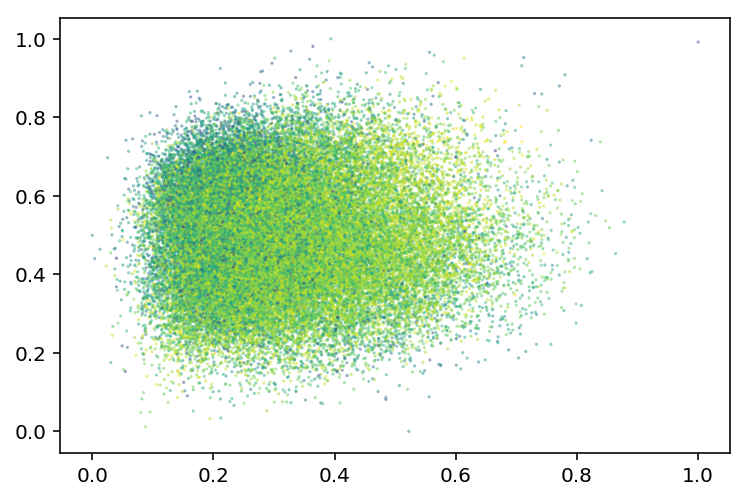

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [20]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)



In [21]:
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

In [22]:
df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

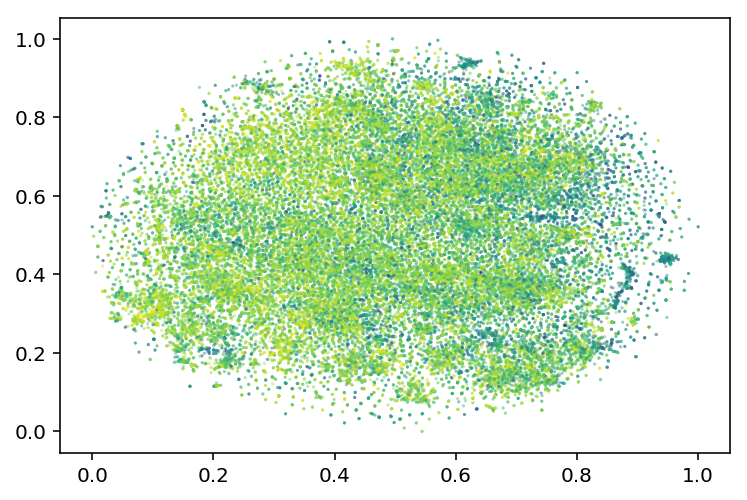

In [23]:
plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()